In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import string
from nltk.stem.snowball import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
movies = pd.read_csv("imdb_master.csv", encoding = "ISO-8859-1")

In [ ]:
movies.drop(labels=['type','file','Unnamed: 0'], axis=1 , inplace =True)

In [ ]:
filt = movies['label'] == 'unsup'
list1 = movies[filt]
list1 = list1.index.tolist()
movies.drop(labels =list1, axis = 0 , inplace =True)

In [ ]:
#Converting review column to lower case
movies['review'] = movies['review'].str.lower()

In [ ]:
#removing punctuations
def remove_punctuation(text):
  for element in text:
    if element in string.punctuation:
      text = text.replace(element, "")
  return text
movies['review'] = movies['review'].apply(remove_punctuation)

In [ ]:
#removing stopwords
stop =stopwords.words('english')
movies['review'] = movies['review'].apply( lambda x : " ".join([word for word in x.split() if word not in (stop)]))

In [ ]:
#Stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
movies['review'] = movies['review'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

In [ ]:
movies.to_csv('out.csv', index=False)  

In [ ]:
movies.shape

(50000, 2)

In [ ]:
#seperating labels
X = movies['review']
y = movies['label']

In [ ]:
#Test Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#bag of words representation
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow_train = count_vect.fit_transform(X_train)
bow_test = count_vect.transform(X_test) # we cannot use fit_tranform here as it will introduce bias into our testing data

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 6)
clf.fit(bow_train, y_train)

MultinomialNB(alpha=6)

In [ ]:
y_pred_test  = clf.predict(bow_test)
y_pred_train = clf.predict(bow_train)

In [ ]:
from sklearn.metrics import accuracy_score
#accuracy score for testing set
acc = accuracy_score(y_test ,y_pred_test, normalize = True)* float(100)
print(acc)

84.78666666666666


In [ ]:
#acuracy score for training set
acc = accuracy_score(y_train , y_pred_train, normalize = True)* float(100)
print(acc)

88.38285714285715


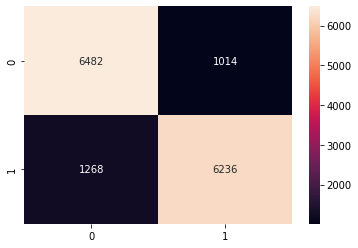

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot =True , fmt='d')